In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("turbine_loc_test.csv", sep=',')
df.head()

,x,y
0,3690.323986,370.757560
1,3259.406706,2682.588354
2,478.523823,326.121719
3,2028.458028,1131.161344
4,165.682335,1288.756179


In [3]:
df[:-1]

,x,y
0,3690.323986,370.757560
1,3259.406706,2682.588354
2,478.523823,326.121719
3,2028.458028,1131.161344
4,165.682335,1288.756179
5,3405.311585,1564.737155
6,3068.043528,853.969863
7,1811.671923,1895.344849
8,1335.102425,2126.794299
9,2646.361875,651.819045


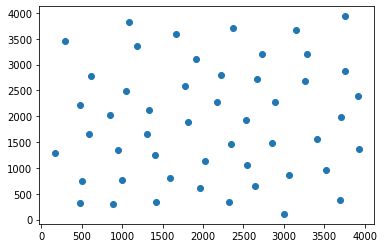

In [4]:
plt.scatter(df[['x']],df[['y']])

In [5]:
import random
radius=400
rangePoint= (50,3950)
deltas = set()
for x in range(-radius, radius+1):
    for y in range(-radius, radius+1):
        if x*x+ y*y<= radius*radius:
            deltas.add((x,y))
            
randPoints=[]
excluded = set()
i=0
while i<50:
    x=random.randrange(*rangePoint)
    y=random.randrange(*rangePoint)
    if (x,y) in excluded:
        continue
    randPoints.append((x,y))
    i+=1
    excluded.update((x+dx,y+dy) for (dx,dy) in deltas)




In [ ]:
randPoints

In [6]:
randPoints = list(randPoints)
rp=pd.DataFrame(randPoints)
rp.head()
#plt.scatter(rp[[]],randPoints[1])

,0,1
0,2030,812
1,3793,3024
2,1113,926
3,2867,592
4,1499,2115


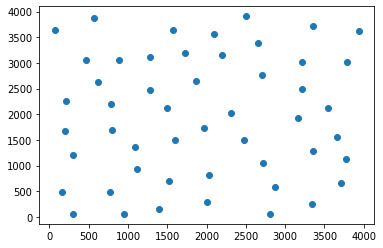

In [7]:
plt.scatter(rp[[0]],rp[[1]])

In [ ]:
from shapely.geometry import Point             # Imported for constraint checking
from shapely.geometry.polygon import Polygon   
bound_clrnc      = 50
prox_constr_viol = False
peri_constr_viol = False
turb_coords= rp
turb_diam=100
# create a shapely polygon object of the wind farm
farm_peri = [(0, 0), (0, 4000), (4000, 4000), (4000, 0)]
farm_poly = Polygon(farm_peri)
    
    # checks if for every turbine perimeter constraint is satisfied. 
    # breaks out if False anywhere
for turb in turb_coords:
    turb = Point(turb)
    inside_farm   = farm_poly.contains(turb)
    correct_clrnc = farm_poly.boundary.distance(turb) >= bound_clrnc
    if (inside_farm == False or correct_clrnc == False):
        peri_constr_viol = True
        break
    
    # checks if for every turbines proximity constraint is satisfied. 
    # breaks out if False anywhere
for i,turb1 in enumerate(turb_coords):
     for turb2 in np.delete(turb_coords, i, axis=0):
        if  np.linalg.norm(turb1 - turb2) < 4*turb_diam:
            prox_constr_viol = True
            break
    
    # print messages
if  peri_constr_viol  == True  and prox_constr_viol == True:
    print('Somewhere both perimeter constraint and proximity constraint are violated\n')
elif peri_constr_viol == True  and prox_constr_viol == False:
    print('Somewhere perimeter constraint is violated\n')
elif peri_constr_viol == False and prox_constr_viol == True:
    print('Somewhere proximity constraint is violated\n')
else: 
    print('Both perimeter and proximity constraints are satisfied !!\n')
        


In [ ]:

!conda install shapely

In [8]:
rp.to_csv('newpoints.csv',header= ['x','y'], index= False)